In [1]:
import os
import pandas as pd
%matplotlib inline

In [2]:
import nltk
nltk.download('vader_lexicon')
nltk.download('wordnet')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/andresmejialievano/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/andresmejialievano/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi.newsapi_client import NewsApiClient
from datetime import date, datetime, timedelta

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [4]:
# Read your api key environment variable
news_api = os.getenv("NEWS_API")

In [5]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=news_api)

In [6]:
# Fetch the Bitcoin news articles
current_date = date.today()
past_date = date.today() - timedelta(weeks=1)
bitcoin_headlines = newsapi.get_everything(
    q="bitcoin",
    from_param=str(past_date),
    to=str(current_date),
    language="en"
    #page_size=100,
    #sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Bitcoin: {bitcoin_headlines['totalResults']}")

# Show sample article
bitcoin_headlines["articles"][0]

Total articles about Bitcoin: 956


{'source': {'id': 'mashable', 'name': 'Mashable'},
 'author': 'Stan Schroeder',
 'title': "HTC's Exodus 5G router can be a Bitcoin node",
 'description': 'After launching two cryptocurrency-oriented smartphones, the HTC Exodus 1 and the Exodus 1s, the company is expanding the lineup with an entirely new device: a 5G router that can function as a full Bitcoin node. Called the HTC Exodus 5G hub, the Android-based…',
 'url': 'https://mashable.com/article/htc-exodus-5g-hub/',
 'urlToImage': 'https://mondrian.mashable.com/2020%252F03%252F04%252F22%252Fe8359029a8744acb93599edc973a0d95.7928e.jpg%252F1200x630.jpg?signature=b9tTdqwOKyi9aHqSL-KIA6J_RwY=',
 'publishedAt': '2020-03-04T13:00:00Z',
 'content': 'After launching two cryptocurrency-oriented smartphones, the HTC Exodus 1 and the Exodus 1s, the company is expanding the lineup with an entirely new device: a 5G router that can function as a full Bitcoin node.\xa0\r\nCalled the HTC Exodus 5G hub, the Android-bas… [+2230 chars]'}

In [7]:
# Fetch the Ethereum news articles
current_date = date.today()
past_date = date.today() - timedelta(weeks=1)
ethereum_headlines = newsapi.get_everything(
    q="ethereum",
    from_param=str(past_date),
    to=str(current_date),
    language="en"
    #page_size=100,
    #sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Ethereum: {ethereum_headlines['totalResults']}")

# Show sample article
ethereum_headlines["articles"][0]

Total articles about Ethereum: 228


{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'Greg Kumparak',
 'title': 'Horizon raises another $5M to put virtual items on the blockchain and launch its first game',
 'description': 'If a player picks up an item in an online video game, who owns that item? The player, or the company that made the game? In most cases, the answer is probably closer to the latter. The item may be in the player’s digital inventory – but the company can take i…',
 'url': 'http://techcrunch.com/2020/03/06/horizon-raises-another-5m-to-put-virtual-items-on-the-blockchain/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2020/03/skyweaver.png?w=756',
 'publishedAt': '2020-03-06T17:01:15Z',
 'content': 'If a player picks up an item in an online video game, who owns that item? The player, or the company that made the game?\r\nIn most cases, the answer is probably closer to the latter. The item may be in the players digital inventory – but the company can take i… [+2713 chars]'}

In [8]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        sentiment = analyzer.polarity_scores(article["content"])
      
        bitcoin_sentiments.append({
            "Text": article["content"],
            "Date": article["publishedAt"][:10],
            "Compound": sentiment["compound"],
            "Positive": sentiment["pos"],
            "Negative": sentiment["neg"],
            "Neutral": sentiment["neu"]
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["Date",  "Compound",  "Negative", "Neutral", "Positive", "Text"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,Date,Compound,Negative,Neutral,Positive,Text
0,2020-03-04,0.0000,0.000,1.000,0.000,After launching two cryptocurrency-oriented sm...
1,2020-03-04,-0.5106,0.168,0.730,0.103,Indias Supreme Court on Wednesday overturned c...
2,2020-03-06,0.5070,0.000,0.932,0.068,Our robot colleague Satoshi Nakaboto writes ab...
3,2020-03-04,0.7893,0.000,0.863,0.137,Our robot colleague Satoshi Nakaboto writes ab...
4,2020-03-10,0.5070,0.000,0.935,0.065,Our robot colleague Satoshi Nakaboto writes ab...


In [9]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        sentiment = analyzer.polarity_scores(article["content"])
      
        ethereum_sentiments.append({
            "Text": article["content"],
            "Date": article["publishedAt"][:10],
            "Compound": sentiment["compound"],
            "Positive": sentiment["pos"],
            "Negative": sentiment["neg"],
            "Neutral": sentiment["neu"]
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["Date",  "Compound",  "Negative", "Neutral", "Positive", "Text"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,Date,Compound,Negative,Neutral,Positive,Text
0,2020-03-06,0.0000,0.00,1.000,0.000,If a player picks up an item in an online vide...
1,2020-03-05,0.4019,0.00,0.932,0.068,The South Korean National Assembly passed new ...
2,2020-03-08,0.4432,0.00,0.935,0.065,The parent company of the Fatburger franchise ...
3,2020-03-04,0.2263,0.06,0.839,0.102,"Joseph Lubin, Co-Founder, Ethereum; Founder, C..."
4,2020-03-05,0.4019,0.00,0.937,0.063,What do we talk about when we talk about progr...


In [10]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,Compound,Negative,Neutral,Positive
count,19.000000,19.000000,19.000000,19.000000
mean,0.307716,0.032053,0.881737,0.086316
std,0.394789,0.047014,0.083140,0.060746
min,-0.510600,0.000000,0.689000,0.000000
25%,0.086250,0.000000,0.856000,0.057500
50%,0.401900,0.000000,0.902000,0.068000
75%,0.542050,0.049000,0.932500,0.101000
max,0.875000,0.168000,1.000000,0.267000


In [11]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.00000,20.000000,20.000000
mean,0.253005,0.01760,0.919550,0.062900
std,0.380506,0.03798,0.059052,0.055964
min,-0.670500,0.00000,0.813000,0.000000
25%,0.000000,0.00000,0.872000,0.000000
50%,0.339700,0.00000,0.933500,0.064000
75%,0.487075,0.00975,0.953000,0.102250
max,0.802000,0.15300,1.000000,0.163000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin: 0.103778

Q: Which coin had the highest compound score?

A: Bitcoin: 0.880700

Q. Which coin had the highest positive score?

A: Bitcoin: 0.267000

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [13]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    
    # Remove the punctuation
    re_clean = regex.sub('', text)
    
    # Create a list of the words
    words_list = word_tokenize(re_clean)

    # Convert the words to lowercase
    words_list = [word.lower() for word in words_list]
    
    # Remove the stop words
    words_list = [word for word in words_list if word not in sw]
    
    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in words_list]
    
    return tokens

In [14]:
# Create a new tokens column for bitcoin
bitcoin_df['tokens'] = bitcoin_df['Text'].apply(lambda x: tokenizer(x))
bitcoin_df.head()

,Date,Compound,Negative,Neutral,Positive,Text,tokens
0,2020-03-04,0.0000,0.000,1.000,0.000,After launching two cryptocurrency-oriented sm...,"[launching, two, cryptocurrencyoriented, smart..."
1,2020-03-04,-0.5106,0.168,0.730,0.103,Indias Supreme Court on Wednesday overturned c...,"[india, supreme, court, wednesday, overturnedc..."
2,2020-03-06,0.5070,0.000,0.932,0.068,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."
3,2020-03-04,0.7893,0.000,0.863,0.137,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."
4,2020-03-10,0.5070,0.000,0.935,0.065,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."


In [15]:
# Create a new tokens column for ethereum
ethereum_df['tokens'] = ethereum_df['Text'].apply(lambda x: tokenizer(x))
ethereum_df.head()

,Date,Compound,Negative,Neutral,Positive,Text,tokens
0,2020-03-06,0.0000,0.00,1.000,0.000,If a player picks up an item in an online vide...,"[player, pick, item, online, video, game, owns..."
1,2020-03-05,0.4019,0.00,0.932,0.068,The South Korean National Assembly passed new ...,"[south, korean, national, assembly, passed, ne..."
2,2020-03-08,0.4432,0.00,0.935,0.065,The parent company of the Fatburger franchise ...,"[parent, company, fatburger, franchise, planni..."
3,2020-03-04,0.2263,0.06,0.839,0.102,"Joseph Lubin, Co-Founder, Ethereum; Founder, C...","[joseph, lubin, cofounder, ethereum, founder, ..."
4,2020-03-05,0.4019,0.00,0.937,0.063,What do we talk about when we talk about progr...,"[talk, talk, progressive, proofofwork, progpow..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams

In [17]:
# Generate the Bitcoin N-grams where N=2

bigram_counts_bitcoin = bitcoin_df['tokens'].apply(lambda x: Counter(ngrams(x, n=2)))

def mergeDict(dict1, dict2):
   """" Merge dictionaries and sum values of common keys in list """
   dict3 = {**dict1, **dict2}
   for key, value in dict3.items():
       if key in dict1 and key in dict2:
               dict3[key] = value + dict1[key]
   return dict3

In [18]:
merged_dict_bitcoin = bigram_counts_bitcoin[0]
for i in range(len(bigram_counts_bitcoin)-1):
    merged_dict_bitcoin = mergeDict(merged_dict_bitcoin, bigram_counts_bitcoin[i+1])
Counter(merged_dict_bitcoin).most_common(20)

[(('satoshi', 'nakaboto'), 10),
 (('robot', 'colleague'), 5),
 (('colleague', 'satoshi'), 5),
 (('nakaboto', 'writes'), 5),
 (('writes', 'bitcoin'), 5),
 (('bitcoin', 'btc'), 5),
 (('btc', 'every'), 5),
 (('every', 'fucking'), 5),
 (('fucking', 'daywelcome'), 5),
 (('daywelcome', 'another'), 5),
 (('another', 'edition'), 5),
 (('edition', 'bitcoin'), 5),
 (('bitcoin', 'today'), 5),
 (('today', 'satoshi'), 5),
 (('nakaboto', 'tell'), 5),
 (('tell', 'whats'), 5),
 (('whats', 'going'), 5),
 (('going', 'bitcoin'), 5),
 (('bitcoin', 'past'), 5),
 (('past', 'hour'), 5)]

In [19]:
# Generate the Ethereum N-grams where N=2
bigram_counts_ethereum = ethereum_df['tokens'].apply(lambda x: Counter(ngrams(x, n=2)))
merged_dict_ethereum = bigram_counts_ethereum[0]
for i in range(len(bigram_counts_ethereum)-1):
    merged_dict_ethereum = mergeDict(merged_dict_ethereum, bigram_counts_ethereum[i+1])
Counter(merged_dict_ethereum).most_common(20)

[(('player', 'pick'), 2),
 (('pick', 'item'), 2),
 (('item', 'online'), 2),
 (('online', 'video'), 2),
 (('video', 'game'), 2),
 (('game', 'owns'), 2),
 (('owns', 'item'), 2),
 (('item', 'player'), 2),
 (('player', 'company'), 2),
 (('company', 'made'), 2),
 (('made', 'gamein'), 2),
 (('gamein', 'case'), 2),
 (('case', 'answer'), 2),
 (('answer', 'probably'), 2),
 (('probably', 'closer'), 2),
 (('closer', 'latter'), 2),
 (('latter', 'item'), 2),
 (('item', 'may'), 2),
 (('may', 'player'), 2),
 (('player', 'digital'), 2)]

In [20]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [21]:
# Get the top 10 words for Bitcoin
merged_tokens_bitcoin = bitcoin_df['tokens'][0]
for i in range(len(bitcoin_df['tokens'])-1):
    merged_tokens_bitcoin = merged_tokens_bitcoin + bitcoin_df['tokens'][i+1]

merged_tokens_bitcoin
token_count_bitcoin = token_count(merged_tokens_bitcoin)
token_count_bitcoin

[('bitcoin', 18),
 ('char', 18),
 ('satoshi', 10),
 ('nakaboto', 10),
 ('btc', 6),
 ('today', 6),
 ('going', 6),
 ('used', 6),
 ('robot', 5),
 ('colleague', 5)]

In [22]:
# Get the top 10 words for Ethereum
merged_tokens_ethereum = ethereum_df['tokens'][0]
for i in range(len(ethereum_df['tokens'])-1):
    merged_tokens_ethereum = merged_tokens_ethereum + ethereum_df['tokens'][i+1]

merged_tokens_ethereum
token_count_ethereum = token_count(merged_tokens_ethereum)
token_count_ethereum

[('char', 20),
 ('company', 7),
 ('ethereum', 7),
 ('blockchain', 7),
 ('player', 6),
 ('item', 6),
 ('new', 5),
 ('market', 5),
 ('crypto', 4),
 ('progpow', 4)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [24]:
# Generate the Bitcoin word cloud
words_bitcoin = bitcoin_df['tokens'][0]
for i in range(len(bitcoin_df['tokens'])-1):
    words_bitcoin = words_bitcoin + bitcoin_df['tokens'][i+1]

words_bitcoin = ' '.join(words_bitcoin)

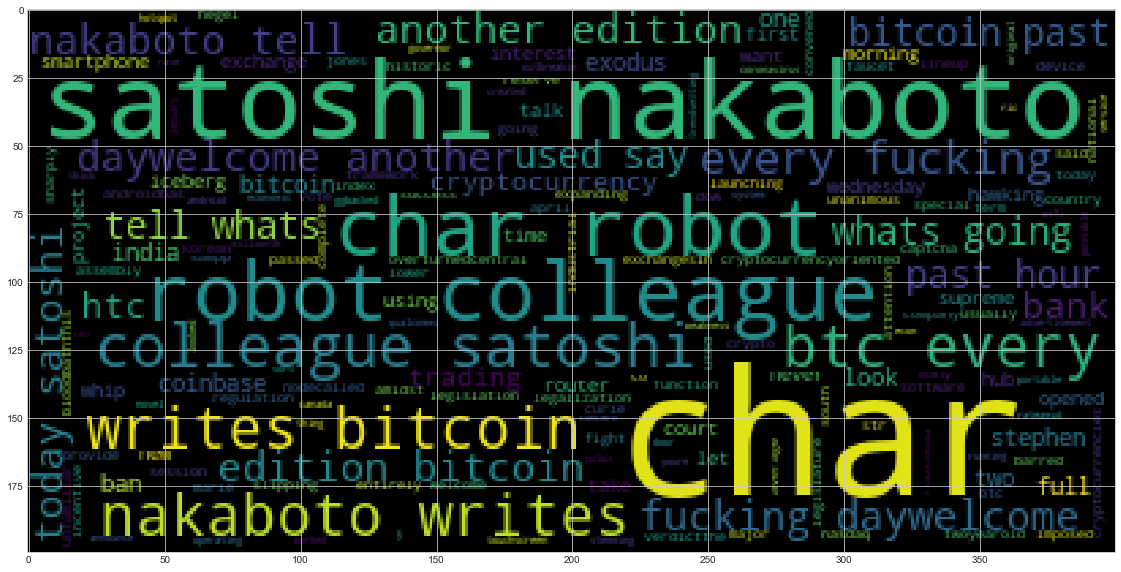

In [25]:
wc = WordCloud().generate(words_bitcoin)
plt.imshow(wc)

In [26]:
# Generate the Ethereum word cloud
words_ethereum = ethereum_df['tokens'][0]
for i in range(len(ethereum_df['tokens'])-1):
    words_ethereum = words_ethereum + ethereum_df['tokens'][i+1]

words_ethereum = ' '.join(words_ethereum)

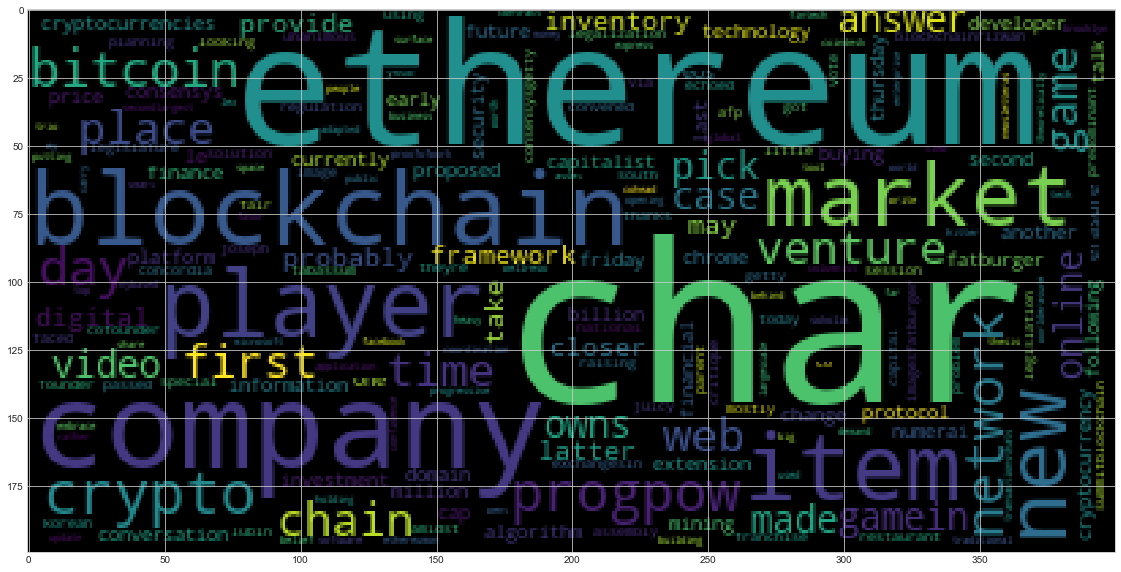

In [27]:
wc = WordCloud().generate(words_ethereum)
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [28]:
import spacy
from spacy import displacy

In [31]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [30]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [32]:
# Concatenate all of the bitcoin text together
corpus_bitcoin = bitcoin_df['Text'][0]
for i in range(len(bitcoin_df['Text'])-1):
    corpus_bitcoin = corpus_bitcoin + bitcoin_df['Text'][i+1]

corpus_bitcoin

'After launching two cryptocurrency-oriented smartphones, the HTC Exodus 1 and the Exodus 1s, the company is expanding the lineup with an entirely new device: a 5G router that can function as a full Bitcoin node.\xa0\r\nCalled the HTC Exodus 5G hub, the Android-bas… [+2230 chars]Indias Supreme Court on Wednesday overturned\xa0central banks two-year-old ban on cryptocurrency trading in the country in what many said was a historic verdict.\r\nThe Reserve Bank of India had imposed a ban on cryptocurrency trading in April 2018 that barred ban… [+1336 chars]Our robot colleague Satoshi Nakaboto writes about Bitcoin BTC every fucking day.\r\nWelcome to another edition of Bitcoin Today, where I, Satoshi Nakaboto, tell you whats been going on with Bitcoin in the past 24 hours. As Stephen Hawking used to say: Lets get … [+3088 chars]Our robot colleague Satoshi Nakaboto writes about Bitcoin BTC every fucking day.\r\nWelcome to another edition of Bitcoin Today, where I, Satoshi Nakaboto, tell you 

In [36]:
# Run the NER processor on all of the text
doc = nlp(corpus_bitcoin)
# Add a title to the document

In [37]:
# Render the visualization
displacy.render(doc, style='ent')

In [38]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

two CARDINAL
HTC Exodus 1 PRODUCT
Exodus WORK_OF_ART
5 CARDINAL
Bitcoin GPE
HTC Exodus 5 PRODUCT
Android-bas GPE
Supreme Court ORG
Wednesday DATE
two-year-old DATE
The Reserve Bank of India ORG
April 2018 DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
the past 24 hours TIME
Stephen Hawking PERSON
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
the past 24 hours TIME
Rousseau PERSON
Success ORG
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
the past 24 hours TIME
Hegel PERSON
chars]The South Korean National Assembly ORG
today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
the past 24 hours TIME
Marie Curie PERSON
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
the past 24 hours TIME
Stephen Hawking PERSON
This morning TIME
US GPE
872.42 CARDIN

---

## Ethereum NER

In [39]:
# Concatenate all of the bitcoin text together
corpus_ethereum = ethereum_df['Text'][0]
for i in range(len(ethereum_df['Text'])-1):
    corpus_ethereum = corpus_ethereum + ethereum_df['Text'][i+1]

corpus_ethereum

'If a player picks up an item in an online video game, who owns that item? The player, or the company that made the game?\r\nIn most cases, the answer is probably closer to the latter. The item may be in the players digital inventory – but the company can take i… [+2713 chars]The South Korean National Assembly passed new legislation today that will provide a framework for the regulation and legalization of cryptocurrencies and crypto exchanges.\r\nIn a unanimous vote during a special session of the legislature convened amidst the co… [+2878 chars]The parent company of the Fatburger franchise is planning on buying a new chain of restaurants, and ... [+] they\'re raising the capital using the ethereum blockchain.\r\nRizwan Tabassum/ AFP via Getty Images\r\nFatburger just got a little more juicy thanks to a h… [+12437 chars]Joseph Lubin, Co-Founder, Ethereum; Founder, Consensys\r\nGetty Images for Concordia Summit\r\nBlockchain, as a new technology, has faced fair critique in the last few

In [40]:
# Run the NER processor on all of the text
doc = nlp(corpus_bitcoin)
# Add a title to the document

In [41]:
# Render the visualization
displacy.render(doc, style='ent')

In [43]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

two CARDINAL
HTC Exodus 1 PRODUCT
Exodus WORK_OF_ART
5 CARDINAL
Bitcoin GPE
HTC Exodus 5 PRODUCT
Android-bas GPE
Supreme Court ORG
Wednesday DATE
two-year-old DATE
The Reserve Bank of India ORG
April 2018 DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
the past 24 hours TIME
Stephen Hawking PERSON
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
the past 24 hours TIME
Rousseau PERSON
Success ORG
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
the past 24 hours TIME
Hegel PERSON
chars]The South Korean National Assembly ORG
today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
the past 24 hours TIME
Marie Curie PERSON
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
the past 24 hours TIME
Stephen Hawking PERSON
This morning TIME
US GPE
872.42 CARDIN